# Анализ данных на Python

*Алла Тамбовцева, НИУ ВШЭ*

## Практикум по предварительной обработке текста и построению облака слов

### Подготовка к работе

В этом практикуме мы будем работать с текстом, в частности, построим на основе текста облако слов (*word cloud*), которое показывает, какие слова встречаются в тексте чаще, а какие – реже.

Установим необходимые библиотеки:

* библиотека `wordcloud` для построения облака слов ([тьюториал](https://www.datacamp.com/tutorial/wordcloud-python) по работе с библиотекой);
* библиотека `pymorphy2` (для Python версии 3.11 и выше нужен `pymorphy3`, исправьте в коде ниже) для морфологического анализа текстов, понадобится для приведения слов к начальной форме ([документация](https://pymorphy2.readthedocs.io/en/stable/)).

In [ ]:
!pip install --upgrade pip
!pip install --upgrade wordcloud 
!pip install --upgrade pymorphy2

Команда `pip install ...` используется для установки библиотек, к ней можно добавить опцию `--upgrade` на случай, если библиотека на компьютере уже установлена в более старой версии, а мы хотим её обновить. Символ `!` в начале строки сообщает Jupyter, что это особая операция, как будто бы запускаемая с командной строки или из терминала, а не код Python с соответствующим синтаксисом. Строка с установкой `pip` в самом начале нужна для обновления самого установщика `pip` (если версия установщика старая, логично, что он не все новые версии библиотек сможет корректно поставить).

Импортируем библиотеки, чтобы убедиться, что всё установилось (для надёжности можно перезапустить ядро через *Kernel - Restart* и после импортировать):

In [1]:
import wordcloud
import pymorphy2 # import pymorphy3

Также импортируем модуль `pyplot` с сокращённым названием `plt` из библиотеки `matplotlib` для отрисовки графиков:

In [2]:
from matplotlib import pyplot as plt

Итак, приступим к работе. В переменной `text` сохранён фрагмент статьи Википедии о Владимире Высоцком. 

In [3]:
text = """
Как поэт Высоцкий реализовал себя, прежде всего, в жанре 
авторской песни. Первые из написанных им произведений относятся 
к началу 1960-х годов. Вначале они исполнялись в кругу друзей, 
позже получили широкую известность благодаря распространявшимся 
по стране магнитофонным записям. Поэзия Высоцкого отличалась 
многообразием тем (уличные, лагерные, военные, сатирические, 
бытовые, сказочные, «спортивные» песни), остротой смыслового 
подтекста и акцентированной социально-нравственной позицией 
автора. В его произведениях, рассказывающих о внутреннем 
выборе людей, поставленных в экстремальные обстоятельства, 
прослеживались экзистенциальные мотивы. Творческая эволюция 
Высоцкого прошла в несколько этапов. В его раннем творчестве 
преобладали уличные и дворовые песни. С середины 1960-х годов 
тематика произведений начала расширяться, а песенные циклы — 
складываться в новую «энциклопедию русской жизни». 
В 1970-х годах значительную часть творчества Высоцкого 
составляли песни и стихотворения исповедально-философского характера, 
поэт часто обращался к вечным вопросам бытия.
"""

Глобальная задача практикума – построить облако слов для этого текста и сделать его в форме гитары.


### Задача 1

Напишите программу, которая приводит текст, сохранённый в переменной `text`, к *нормальному виду*. Нормальный вид текста: текст состоит только из слов в начальной форме, записанных маленькими буквами через пробел, нет никаких посторонних символов.

Алгоритм работы:

1. Привести все буквы к нижнему регистру.
2. Заменить все знаки препинания и цифры на пробелы.
3. Разбить текст на слова и получить список слов. При необходимости избавиться от лишних пробелов в словах.
4. Привести каждое слово в списке к начальной форме.
5. Склеить все слова в начальной форме в одну строку с текстом.

In [4]:
# приводим к нижнему регистру
text = text.lower()
print(text)


как поэт высоцкий реализовал себя, прежде всего, в жанре 
авторской песни. первые из написанных им произведений относятся 
к началу 1960-х годов. вначале они исполнялись в кругу друзей, 
позже получили широкую известность благодаря распространявшимся 
по стране магнитофонным записям. поэзия высоцкого отличалась 
многообразием тем (уличные, лагерные, военные, сатирические, 
бытовые, сказочные, «спортивные» песни), остротой смыслового 
подтекста и акцентированной социально-нравственной позицией 
автора. в его произведениях, рассказывающих о внутреннем 
выборе людей, поставленных в экстремальные обстоятельства, 
прослеживались экзистенциальные мотивы. творческая эволюция 
высоцкого прошла в несколько этапов. в его раннем творчестве 
преобладали уличные и дворовые песни. с середины 1960-х годов 
тематика произведений начала расширяться, а песенные циклы — 
складываться в новую «энциклопедию русской жизни». 
в 1970-х годах значительную часть творчества высоцкого 
составляли песни и стихотв

Импортируем из базового модуля `string` (не требует установки) две константы, два набора символов:

* `punctuation`: знаки препинания (для английского языка);
* `digits`: цифры 0-9.

In [5]:
from string import punctuation, digits

In [6]:
print(punctuation, digits)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 0123456789


Склеим эти строки в одну и добавим недостающие символы – длинное тире и русские кавычки «ёлочки»:

In [7]:
# последнее тире скопировано из text
to_exclude = punctuation + digits + "–«»—"

In [8]:
# выполняем замену с перезаписью text
for char in to_exclude:
    text = text.replace(char, " ")
print(text)


как поэт высоцкий реализовал себя  прежде всего  в жанре 
авторской песни  первые из написанных им произведений относятся 
к началу      х годов  вначале они исполнялись в кругу друзей  
позже получили широкую известность благодаря распространявшимся 
по стране магнитофонным записям  поэзия высоцкого отличалась 
многообразием тем  уличные  лагерные  военные  сатирические  
бытовые  сказочные   спортивные  песни   остротой смыслового 
подтекста и акцентированной социально нравственной позицией 
автора  в его произведениях  рассказывающих о внутреннем 
выборе людей  поставленных в экстремальные обстоятельства  
прослеживались экзистенциальные мотивы  творческая эволюция 
высоцкого прошла в несколько этапов  в его раннем творчестве 
преобладали уличные и дворовые песни  с середины      х годов 
тематика произведений начала расширяться  а песенные циклы   
складываться в новую  энциклопедию русской жизни   
в      х годах значительную часть творчества высоцкого 
составляли песни и стихотв

In [9]:
# разбиваем по пробелу или нескольким пробелам
# split() по умолчанию разбивает более умно

words = text.split()

Давайте приведём слова к единой начальной форме! Так, все существительные будут стоять в единственном числе в именительном падеже, все прилагательные – тоже в единственном числе в именительном падеже, но ещё и в мужском роде, глаголы – в неопределённой форме. Эта процедура называется **лемматизацией** (лемма – словарная форма слова). Иногда для унификации слов используют другую процедуру – **стемминг** (от английского *stem* – основа), которая предполагает отсечение всех формообразующих морфем вроде окончаний и суффиксов глаголов, но для нашей цели она не подходит – слова в облаке слов будут некрасиво обрублены.

Создаем объект типа «морфологический анализатор» (класса `MorphAnalyzer`), он поможет автоматически сделать морфологический разбор слова и забрать его начальную форму:

In [10]:
morph = pymorphy2.MorphAnalyzer()

Посмотрим на работу анализатора на примере одного слова (разбор слова или предложения в обработке текста и лингвистике тоже называется парсинг, так как парсинг вообще – это автоматический разбор какой-то структуры):

In [11]:
morph.parse("стекла")

[Parse(word='стекла', tag=OpencorporaTag('NOUN,inan,neut sing,gent'), normal_form='стекло', score=0.828282, methods_stack=((DictionaryAnalyzer(), 'стекла', 157, 1),)),
 Parse(word='стёкла', tag=OpencorporaTag('NOUN,inan,neut plur,nomn'), normal_form='стекло', score=0.080808, methods_stack=((DictionaryAnalyzer(), 'стёкла', 157, 6),)),
 Parse(word='стёкла', tag=OpencorporaTag('NOUN,inan,neut plur,accs'), normal_form='стекло', score=0.080808, methods_stack=((DictionaryAnalyzer(), 'стёкла', 157, 9),)),
 Parse(word='стекла', tag=OpencorporaTag('VERB,perf,intr femn,sing,past,indc'), normal_form='стечь', score=0.010101, methods_stack=((DictionaryAnalyzer(), 'стекла', 1015, 2),))]

Метод `.parse()` вернул список всех возможных вариантов разбора слова, упорядоченный от наиболее вероятного до наименее вероятного. Так, с самой большой вероятностью слово «стекла» – это родительный падеж слова «стекло» (`NOUN` – существительное, `inan` – неодушевленное, `sing` – единственное число, `gent` – родительный падеж, генитив). А с самой маленькой вероятностью это слово является формой глагола «стечь» (`VERB` – глагол, `perf` – прошедшее время, `intr` – непереходный глагол, `indc` – изъявительное наклонение, индикатив).

Из списка можно извлечь самый вероятный первый разбор и забрать его начальную форму:

In [12]:
morph.parse("стекла")[0].normal_form

'стекло'

Задействуем списковое включение и получим для каждого слова в `text` начальную форму:

In [13]:
words_norm = [morph.parse(word)[0].normal_form for word in words]

Теперь снова склеим слова в единый текст – для облака слов список не подойдёт:

In [14]:
text_norm = " ".join(words_norm)
print(text_norm)

как поэт высоцкий реализовать себя прежде весь в жанр авторский песня первый из написать они произведение относиться к начало х год вначале они исполняться в круг друг поздний получить широкий известность благодаря распространяться по страна магнитофонный запись поэзия высоцкий отличаться многообразие тем уличный лагерный военный сатирический бытовой сказочный спортивный песня острота смысловой подтекст и акцентировать социально нравственный позиция автор в он произведение рассказывать о внутренний выбор человек поставить в экстремальный обстоятельство прослеживаться экзистенциальный мотив творческий эволюция высоцкий пройти в несколько этап в он ранний творчество преобладать уличный и дворовый песня с середина х год тематика произведение начало расширяться а песенный цикл складываться в новый энциклопедия русский жизнь в х год значительный часть творчество высоцкий составлять песня и стихотворение исповедальный философский характер поэт часто обращаться к вечный вопрос бытие


**NB.** Совет: в более общем случае лучше написать функцию, которая принимает на вход необработанный текст, а возвращает текст в нормальной форме. 

### Задача 2

Загрузите список *стоп-слов* для русского языка для дальнейшей работы с текстом. Стоп-слова – часто встречающиеся в языке слова вроде предлогов, союзов и местоимений, которые не несут большой смысловой нагрузки и которые обычно исключают при визуализации и частотном анализе текстов.

Вариантов добыть стоп-слова для русского языка много: можно подключить специальные бибиотеки вроде `nltk` (от *Natural Language ToolKit*), можно загрузить список из репозитория какого-нибудь проекта на Github или из готового файла. Готовый файл `stopwords-ru.txt` у нас уже есть:

In [15]:
file = open("stopwords-ru.txt", encoding = "UTF-8")
lines = file.readlines()

В `lines` хранится список строк из файла, вместе с символами для перехода на новую строку:

In [16]:
print(lines[0:10])

['c\n', 'а\n', 'алло\n', 'без\n', 'белый\n', 'близко\n', 'более\n', 'больше\n', 'большой\n', 'будем\n']


Исправляем – убираем лишние отступы с помощью `.strip()`:

In [17]:
stop_ru = [line.strip() for line in lines]

### Задача 3

С помощью библиотеки `wordcloud` постройте облако слов для текста, предварительно обработанного в задаче 1. Исключите при его построении стоп-слова. 

Построим облако слов с помощью `WordCloud()`. Импортируем эту фунцию отдельно, чтобы не таскать длинное название библиотеки за собой:

In [18]:
from wordcloud import WordCloud

In [19]:
# wcloud – объект, в котором хранится информация для построения облака
# временно соханен в какой-то ячейке памяти

wcloud = WordCloud().generate(text_norm)
wcloud

Если выводятся странные ошибки, попробуйте установить более старую версию библиотеки `Pillow`, от неё зависят некоторые процедуры в wordcloud: `!pip install Pillow==9.5.0`.

Теперь отрисуем полученное облако через функцию `.imshow()` и «выключим» оси, так как метки с числами (как на обычных графиках) нам не нужны:

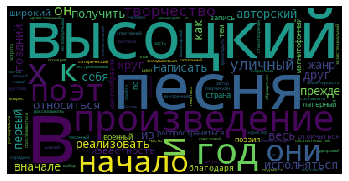

In [20]:
plt.imshow(wcloud)
plt.axis("off")
plt.show()

Проблема: облако слов получилось неинформативным! В нём, действительно, собраны самые частые слова вроде предлогов, а мы явно хотели не этого. Плюс, от сочетаний `1960-х` и `1970-х` в статье остались буквы `х`. Добавим `x` в список стоп-слов и учтём этот список при построении облака:

In [21]:
stop_ru.append("х")

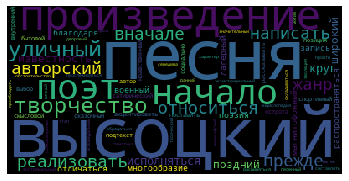

In [22]:
wcloud = WordCloud(stopwords = stop_ru).generate(text_norm)
plt.imshow(wcloud)
plt.axis("off")
plt.show()

Доработаем полученное облако, используя возможности `matplotlib`.

Функция `subplots()` создает два объекта:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG, JPEG или PDF. Вообще функция `subplots()`, как следует из её названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.

(-0.5, 399.5, 199.5, -0.5)

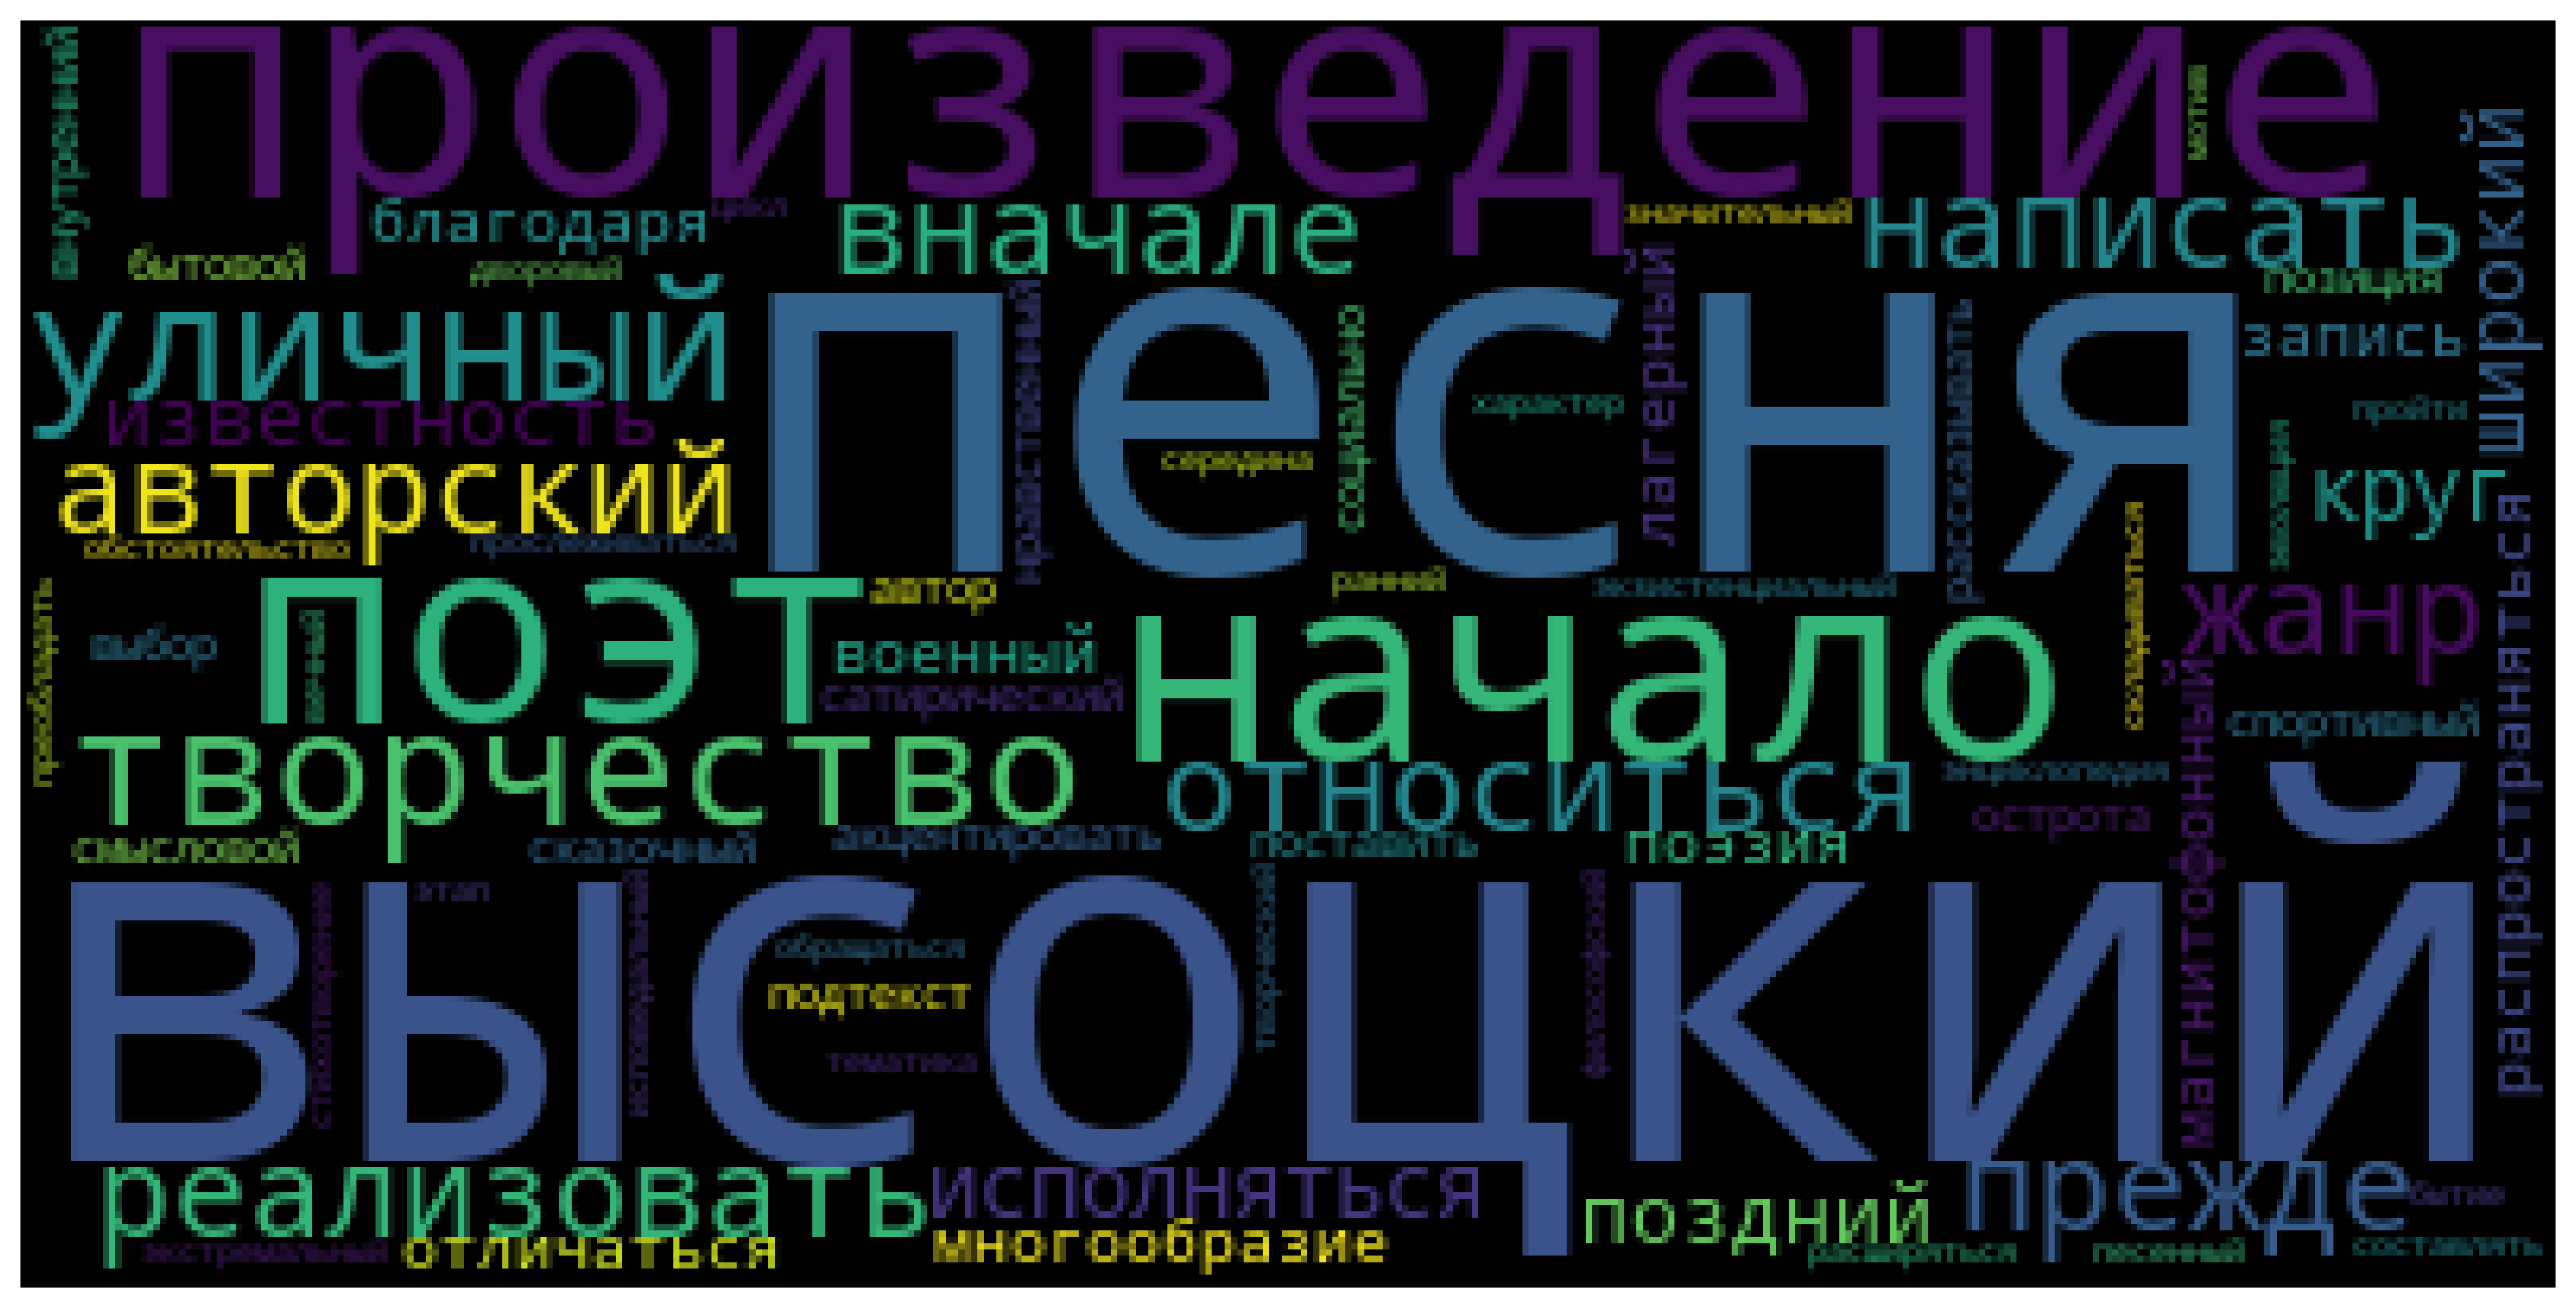

In [23]:
# figsize - размер в дюймах, делаем 16 на 9
# dpi, от dots per inch – разрешение 300 точек на дюйм (это хорошо даже для печати)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.imshow(wcloud)
ax.axis("off")

**Дополнение.** Разрешение в итоге получилось не очень хорошим, нужно синхронизировать размер облака в `WordCloud()` и `subplots()`. В `WordCloud()` можно добавить ширину и высоту изображения с облаком (в пикселях), чтобы оно было побольше (по умолчанию 400 на 200):

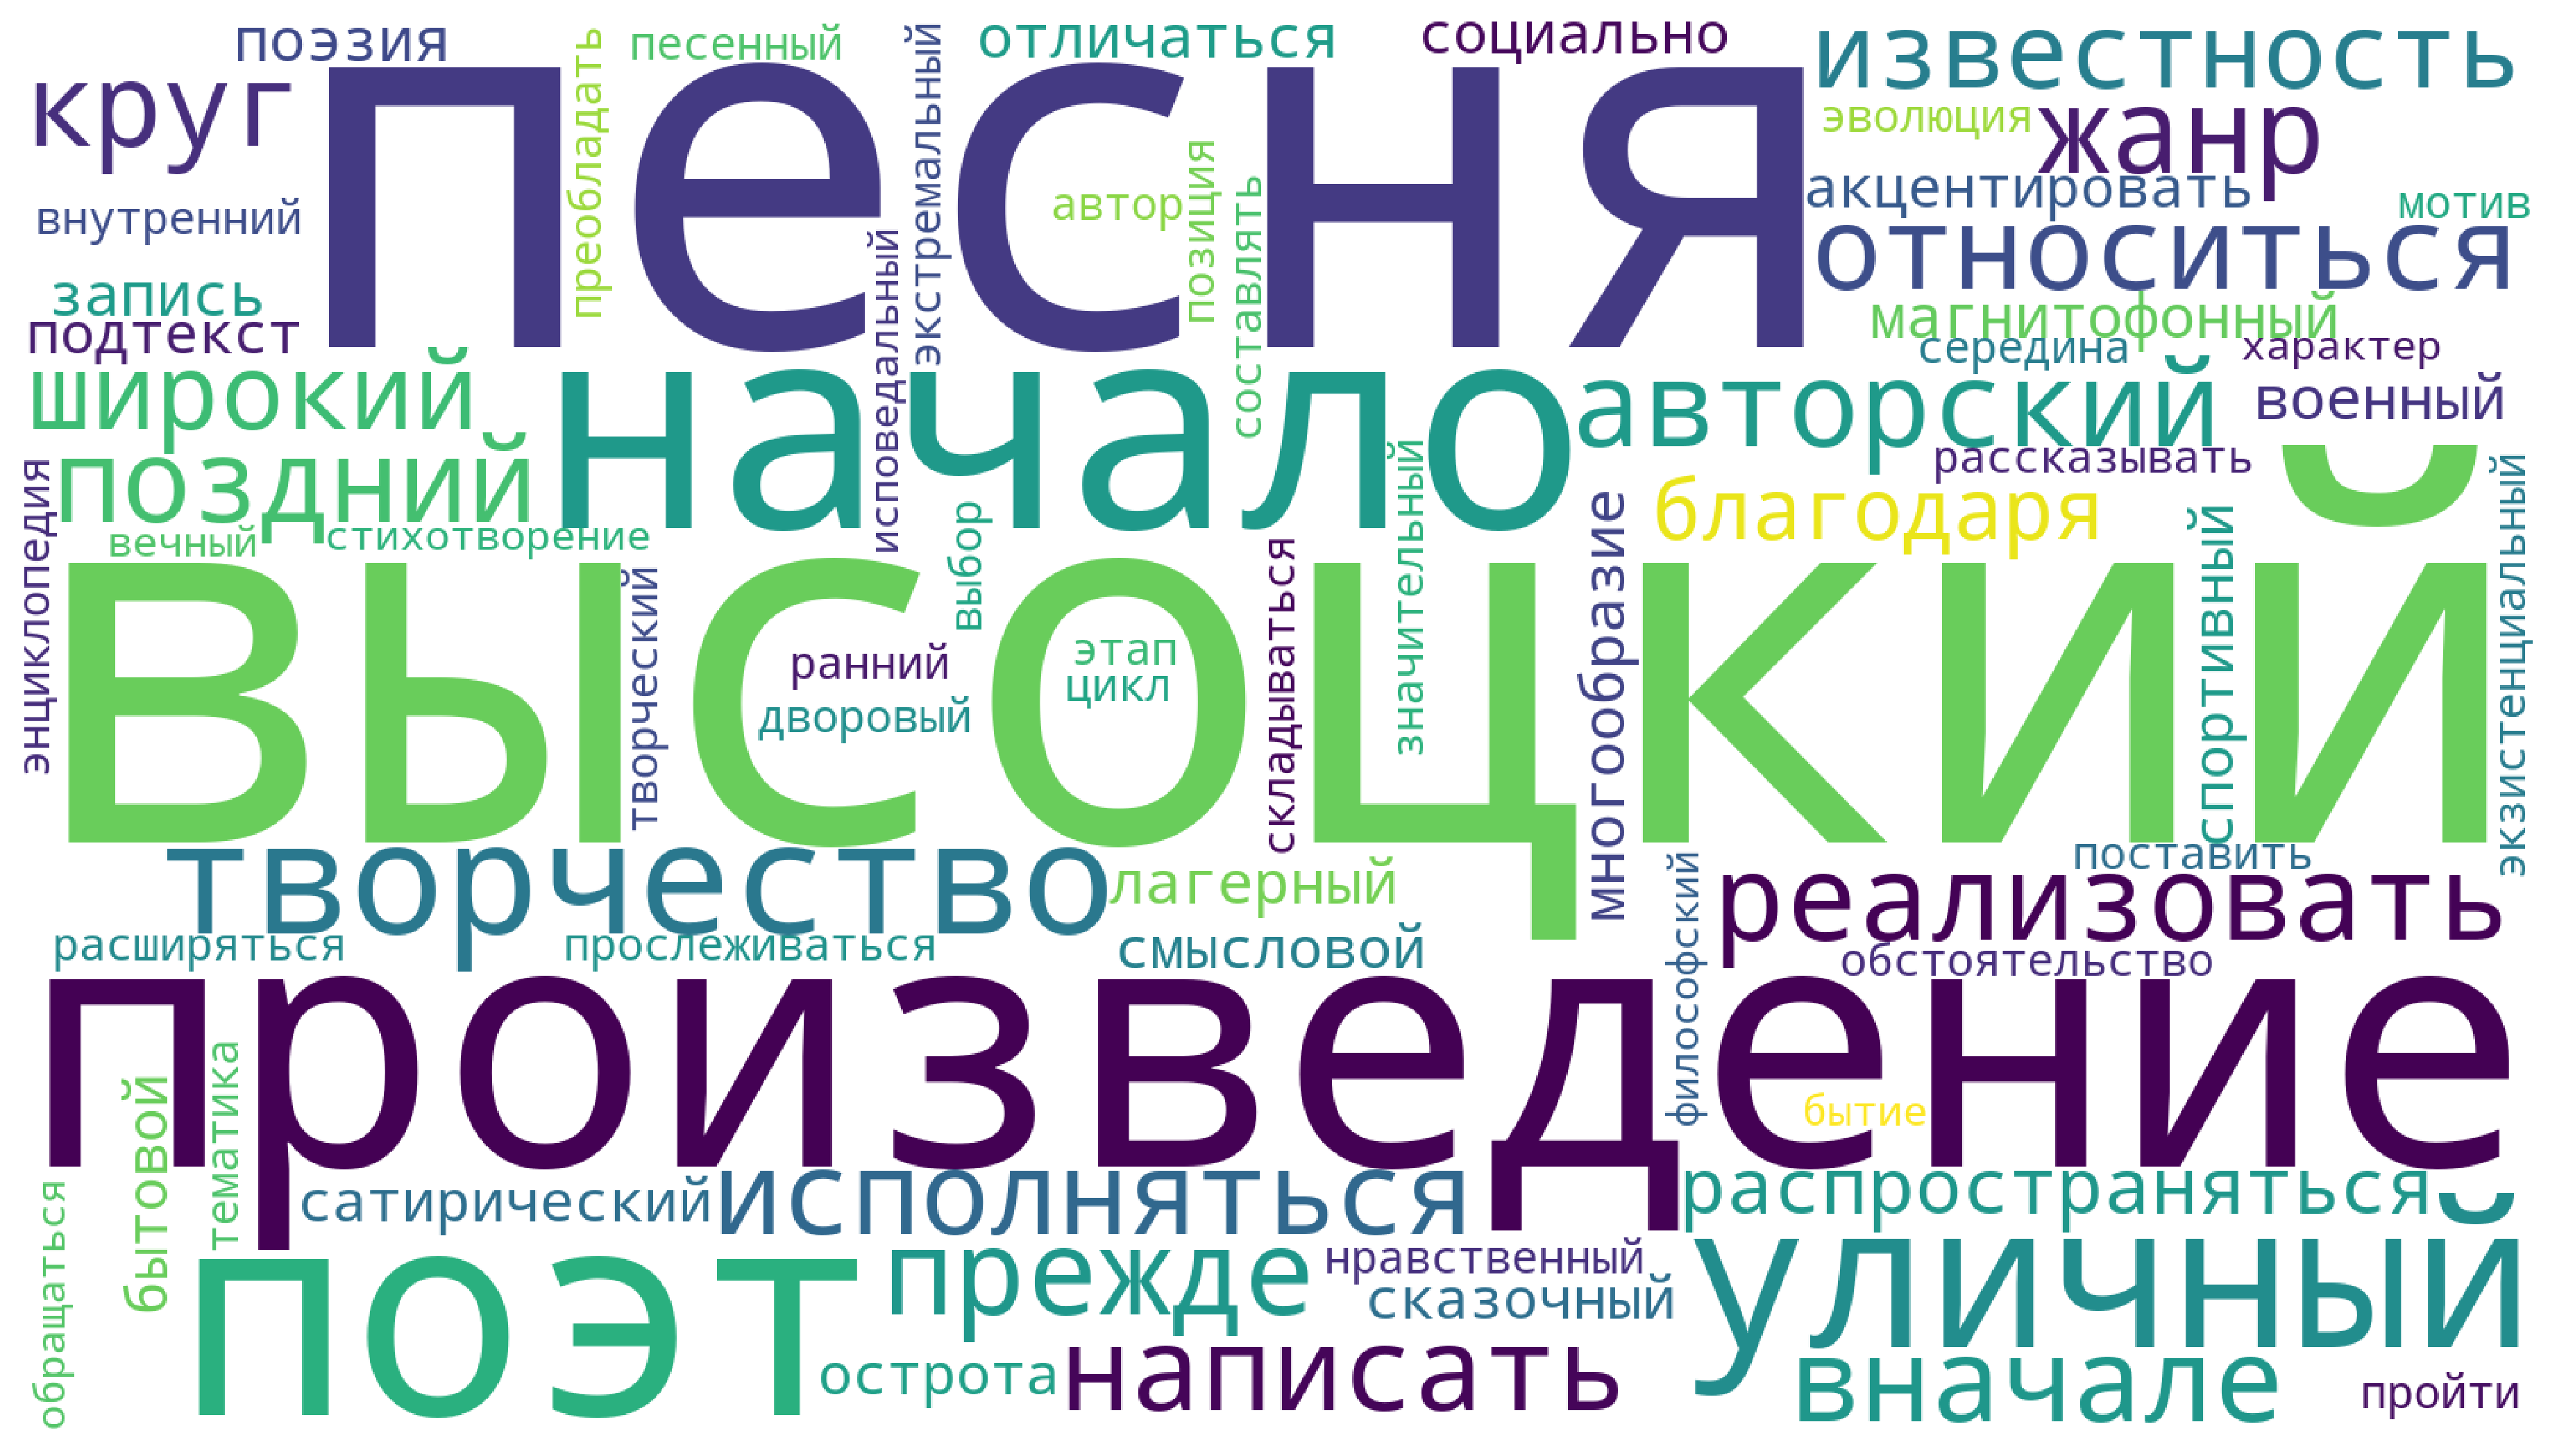

In [24]:
# width и height
# плюс, поменяем цвет фона

wcloud = WordCloud(stopwords = stop_ru, 
                  background_color = "white",
                  width = 1600,
                  height = 900).generate(text_norm)

# тут код тот же
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.imshow(wcloud)
ax.axis("off")

# выгружаем в файл, будет рядом с текущим ipynb

fig.savefig("wordcloud.png")

### Задача 4

Используя изображение из файла `guitar.jpeg`, добавьте маску для облака слов, чтобы сделать его в форме гитары.

В качестве основы для облака слов можно взять изображение, это прекрасно описано в тьюториале [здесь](https://www.datacamp.com/tutorial/wordcloud-python). Мы возьмём векторное изображение с [Freepik](https://ru.freepik.com/). Импортируем набор функций для обработки изображения из библиотеки `PIL` (*Python Imaging Library*) и библиотеку `numpy`, чтобы потом преобразовать изображение в числовой массив:

In [25]:
from PIL import Image
import numpy as np

Загружаем изображение и создаём массив:

In [26]:
my_mask = np.array(Image.open("guitar.jpeg"))
print(my_mask) # каждый пиксель в формате RGB (код цвета Reg-Green-Blue)

[[[123 123 123]
  [123 123 123]
  [123 123 123]
  ...
  [123 123 123]
  [123 123 123]
  [123 123 123]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 33  33  33]
  [ 16  16  16]
  [  7   7   7]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  2   2   2]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  2   2   2]
  [  0   0   0]
  [  0   0   0]]]


(-0.5, 377.5, 773.5, -0.5)

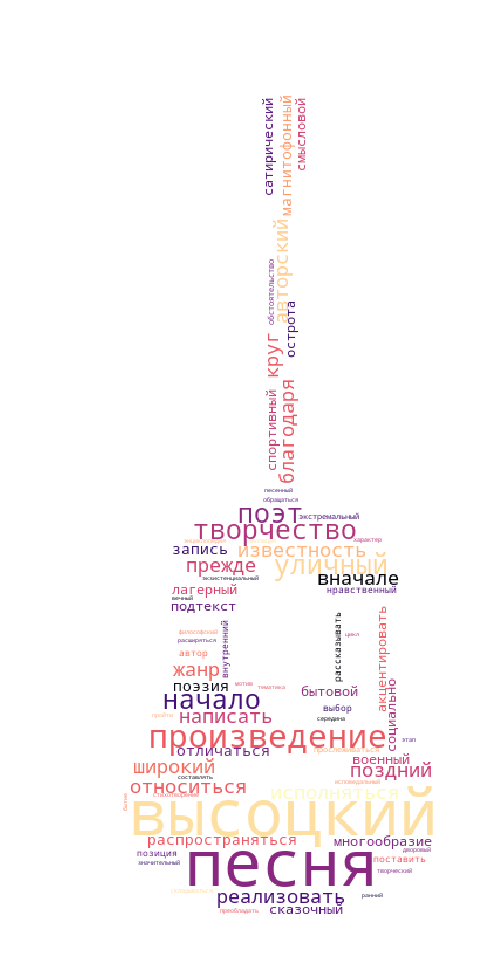

In [27]:
# добавляем маску в mask
# для примера меняем цветовую палитру
# с размерами надо отдельно поработать
# (вытянутый по вертикали файл)

wcloud = WordCloud(stopwords = stop_ru, 
                  background_color = "white",
                  mask = my_mask,
                  colormap = "magma").generate(text_norm)



fig, ax = plt.subplots(dpi = 300)
ax.imshow(wcloud)
ax.axis("off")

Про палитры в `matplotlib` можно почитать [здесь](https://matplotlib.org/stable/users/explain/colors/colormaps.html).